In [ ]:
import os
import pickle
from typing import Literal, List, Tuple

import torch
import numpy as np
import matplotlib.pyplot as plt

# Reconocimiento de Actividad Humana

En esta práctica, vamos a trabajar con una red neuronal convolucional 1D en la tarea de reconocimiento de actividad humana. Específicamente, vamos a utilizar el conjunto de datos “[Human Activity Recognition Using Smartphones](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)” que registra 6 señales provenientes del acelerómetro y del giroscopio de un celular. Estas señales se obtuvieron de 30 individuos, con el celular sujeto a la cintura de cada uno. Nuestro objetivo es diseñar un modelo capaz de utilizar estas señales para inferir la actividad que la persona estaba realizando durante el periodo de muestreo.

# 1. Lectura del conjunto de datos

Para la adquisición del conjunto de datos, cada individuo realizo seis actividades: caminar, subir escaleras, bajar escaleras, sentarse, estar de pie y acostarse. Las señales del giroscopio y del acelerometro fueron recabadas con un teléfono inteligente que tenían sujeto a su cadera. El conjunto de datos ha sido aleatoriamente particionado en
dos conjuntos, en donde **el 70% de los voluntarios fue seleccionado para generar el conjunto de entrenamiento y el 30% restante para el de prueba**.

La estructura del conjunto de datos es la siguiente:

```plaintext
human+activity+recognition+using+smartphones/
└── UCI HAR Dataset/
    ├── train/
    │   ├── y_train.txt  # Etiquetas
    │   └── Inertial Signals/
    │       ├── body_acc_x_train.txt
    │       ├── body_acc_y_train.txt
    │       ├── body_acc_z_train.txt
    │       ├── body_gyro_x_train.txt
    │       ├── body_gyro_y_train.txt
    │       └── body_gyro_z_train.txt
    └── test/
        ├── y_test.py  # Etiquetas
        └── Inertial Signals/
            ├── body_acc_x_test.txt
            ├── body_acc_y_test.txt
            ├── body_acc_z_test.txt
            ├── body_gyro_x_test.txt
            ├── body_gyro_y_test.txt
            └── body_gyro_z_test.txt
```

Cada archivo dentro del directorio `train` tiene el mismo número de líneas, al igual que cada archivo dentro del directorio `test` y las señales de la misma línea a través de los archivos son tomadas del mismo individuo.

In [ ]:
def read_features(file_path: str) -> np.ndarray:
    """Realiza la lectura del conjunto de datos 'Human Activity Recognition
    Using Smartphones'. En específico de las señales provenientes del
    giroscopio y del acelerómetro del dispositivo
    :param file_path: Ruta del archivo a leer.
    :return np.ndarray: Los datos del archivo en un arrelgo de NumPy con
        dimensiones (7_352, 128) y tipo de datos np.float32.
    """
    with open(file_path, "rt") as f:
        content: List[str] = f.readlines()
    # remover salto de línea y separar valores
    content: List[List[str]] = [c.strip().split() for c in content]
    content = np.array(content, dtype=np.float32)  # shape(7_352, 128)
    return content


def read_labels(file_path: str) -> np.ndarray:
    """Realiza la lectura de las etiquetas del conjunto de entrenamiento. Las
    etiquetas son un número entero entre el 1 y el 6 e indican cada una de las
    6 clases.
    :param file_path: Ruta del archivo a leer..
    :return np.ndarray: Las etiquetas del conjunto de datos como arreglo de
        NumPy con dimensiones (7352,) y tipo de datos np.int64.
    """
    with open(file_path, "rt") as f:
        content: List[str] = f.readlines()
    content = [c.strip() for c in content]
    content = np.array(content, dtype=np.int64)
    return content

In [ ]:
# Lectura de los datos de entrenamiento
train_base_path = (
    "human+activity+recognition+using+smartphones/UCI HAR Dataset/train/"
    "Inertial Signals"
)
body_acc_x_train = read_features(
    os.path.join(train_base_path, "body_acc_x_train.txt")
)
body_acc_y_train = read_features(
    os.path.join(train_base_path, "body_acc_y_train.txt")
)
body_acc_z_train = read_features(
    os.path.join(train_base_path, "body_acc_z_train.txt")
)
body_gyro_x_train = read_features(
    os.path.join(train_base_path, "body_gyro_x_train.txt")
)
body_gyro_y_train = read_features(
    os.path.join(train_base_path, "body_gyro_y_train.txt")
)
body_gyro_z_train = read_features(
    os.path.join(train_base_path, "body_gyro_z_train.txt")
)

# Imprimimos las dimensiones de los tensores para validarlos
print(
    "Dimensiones de tensores:",
    body_acc_x_train.shape,
    body_acc_y_train.shape,
    body_acc_z_train.shape,
    body_gyro_x_train.shape,
    body_gyro_y_train.shape,
    body_gyro_z_train.shape
)

# Dado que la clase 'torch.nn.Conv1d' espera una entrada de dimensiones (
# tamaño_de_bache, número_de_canales, longitud de secuencia), vamos a apilar
# los tensores de las señales, esto es, cada señal va a corresponder a un canal
# de entrada del modelo.
train_dataset_numpy = np.stack(
    (
        body_acc_x_train,
        body_acc_y_train,
        body_acc_z_train,
        body_gyro_x_train,
        body_gyro_y_train,
        body_gyro_z_train
    ),
    axis=1)
train_dataset = torch.tensor(train_dataset_numpy, dtype=torch.float32)
print(f"train_dataset.shape: {train_dataset.shape}")

Dimensiones de tensores: (7352, 128) (7352, 128) (7352, 128) (7352, 128) (7352, 128) (7352, 128)
train_dataset.shape: torch.Size([7352, 6, 128])


In [ ]:
# Lectura de las etiquetas del conjunto de entrenamiento
train_labels_path = (
    "human+activity+recognition+using+smartphones/UCI HAR Dataset/train/"
    "y_train.txt"
)
labels_numpy = read_labels(train_labels_path)
labels = torch.tensor(labels_numpy, dtype=torch.int64)
# Sustraemos 1 para convertir los índices del rango 1-6 al rango 0-5
labels = (labels - 1)
print(f"labels.shape: {labels.shape}")

labels.shape: torch.Size([7352])


# 2. Definición del modelo

<div style="text-align: center;">
    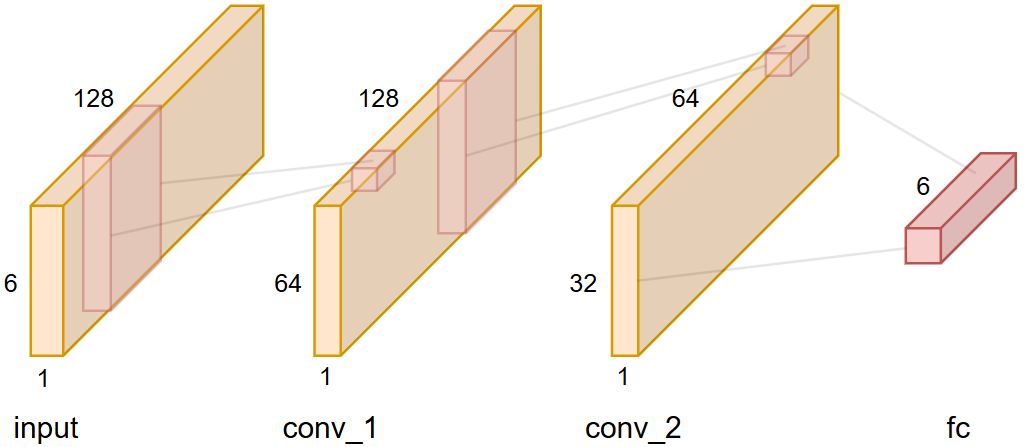
</div>

In [ ]:
class HumanActivityNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self._conv_1 = torch.nn.Sequential(
            torch.nn.Conv1d(
                in_channels=6,
                out_channels=64,
                kernel_size=3,
                padding=1
            ),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(64),
        )  # (N, 64, 128)
        self._conv_2 = torch.nn.Sequential(
            torch.nn.Conv1d(
                in_channels=64,
                out_channels=32,
                kernel_size=3,
                padding=1
            ),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(32),
            torch.nn.MaxPool1d(kernel_size=2)
        )  # (N, 32, 64)
        # 2_048 = 32 (número de canales) * 64 (longitud de secuencia)
        self._fc = torch.nn.Linear(2_048, 6)

    def forward(self, x: torch.tensor) -> torch.tensor:
        """
        :param x: Tensor con dimensiones (N, 6, 128)
        :return: Tensor de dimensiones (N, 6)
        """
        x = self._conv_1(x)
        x = self._conv_2(x)  # (N, 32, 64)
        x = x.view(x.size(0), -1) # (N, 2_048)
        x = self._fc(x)
        return x

# 3. Entrenamiento del modelo

In [ ]:
def train(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    criterion: torch.nn.modules.loss._Loss,
    optimizer: torch.optim.Optimizer,
    num_epochs: int = 10) -> Tuple[List[float], List[float]]:
    """Entrenamiento del modelo. La función imprime la pérdida y exactitud en
    cada época.
    :param criterion: Se asume que la función de reducción es el promedio.
    :return: Una tupla con dos elementos. El primero es el registro de la
        función de pérdida por época y el segundo el registro de la exactitud
        por época.
    """
    loss_history = []
    accuracy_history = []
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in dataloader:
            # inputs (N, 6, 128)
            # labels (N,)

            # Igualar los gradientes a cero
            optimizer.zero_grad()

            # Propagación hacia adelante. predicted (N,)
            outputs = model(inputs)  # outputs (N, 6)
            _, predicted = torch.max(outputs, dim=1)

            # Cálculo de la pérdida
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            # Propagación hacia atras
            loss.backward()
            optimizer.step()

            # Cálculo de exactitud
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(dataloader)
        loss_history.append(epoch_loss)
        epoch_accuracy = (correct / total) * 100
        accuracy_history.append(epoch_accuracy)
        print(
            f"Época {epoch + 1}, Pérdida: {epoch_loss}, Exactitud: "
            f"{epoch_accuracy}%"
        )
    return loss_history, accuracy_history

In [ ]:
# Creamos el dataset y el dataloader.
dataset = torch.utils.data.TensorDataset(train_dataset, labels)  # train_datasett [N, 6, 128] labels [N, ]
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=32, shuffle=True, drop_last=True
)

# Instanciar el the modelo, la función de perdida y el optimizador.
model = HumanActivityNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Entrenamiento del modelo.
loss_history, accuracy_history = train(
    model, dataloader, criterion, optimizer, num_epochs=200
)

Época 1, Pérdida: 0.7861014898687471, Exactitud: 60.862445414847166%
Época 2, Pérdida: 0.5906438080504471, Exactitud: 69.45960698689956%
Época 3, Pérdida: 0.5413337163789824, Exactitud: 72.89847161572052%
Época 4, Pérdida: 0.5078799373197764, Exactitud: 74.90447598253274%
Época 5, Pérdida: 0.48290958948531004, Exactitud: 76.97871179039302%
Época 6, Pérdida: 0.471353440695975, Exactitud: 77.68831877729258%
Época 7, Pérdida: 0.4493490267528717, Exactitud: 78.99836244541486%
Época 8, Pérdida: 0.4405824175698268, Exactitud: 80.40393013100436%
Época 9, Pérdida: 0.41460868852888133, Exactitud: 81.04530567685589%
Época 10, Pérdida: 0.3990536476587104, Exactitud: 81.78220524017468%
Época 11, Pérdida: 0.3777709488785423, Exactitud: 83.10589519650655%
Época 12, Pérdida: 0.37860874734070626, Exactitud: 83.1877729257642%
Época 13, Pérdida: 0.3749099881367913, Exactitud: 83.36517467248909%
Época 14, Pérdida: 0.36732416375495464, Exactitud: 83.3924672489083%
Época 15, Pérdida: 0.3437743961290501, Ex

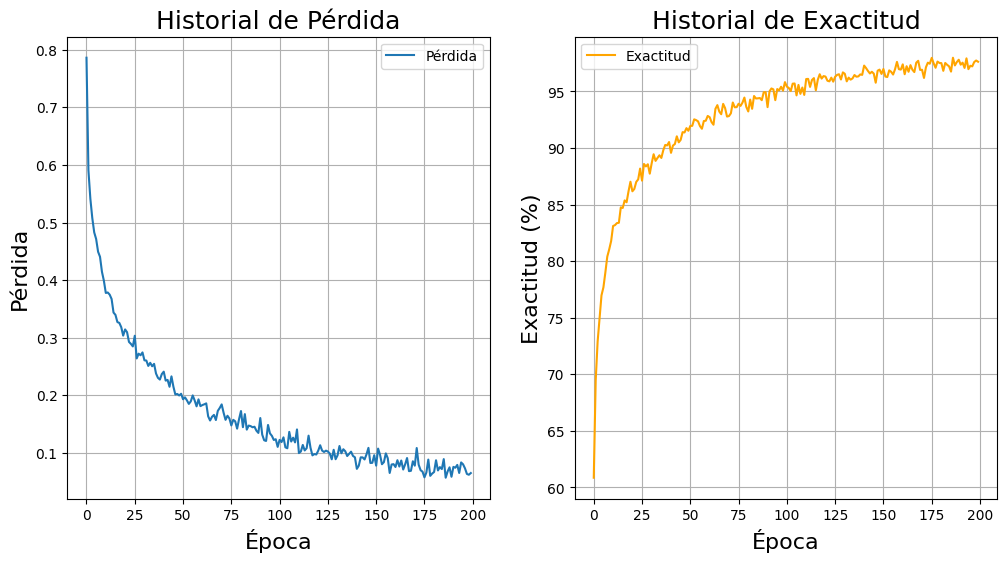

In [ ]:
# Gráfico para la pérdida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Dividimos la figura en 1 fila y 2 columnas, activando el primer subplot
plt.plot(loss_history, label="Pérdida")
plt.xlabel("Época", fontsize=16)
plt.ylabel("Pérdida", fontsize=16)
plt.title("Historial de Pérdida", fontsize=18)
plt.legend()
plt.grid()


# Gráfico para la exactitud
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Exactitud', color='orange')
plt.xlabel('Época', fontsize=16)
plt.ylabel('Exactitud (%)', fontsize=16)
plt.title('Historial de Exactitud', fontsize=18)
plt.legend()
plt.grid()

# 4. Evaluación del modelo en el conjunto de prueba

In [ ]:
# Lectura de los datos de entrenamiento
test_base_path = (
    "human+activity+recognition+using+smartphones/UCI HAR Dataset/test/"
    "Inertial Signals"
)
body_acc_x_train = read_features(
    os.path.join(train_base_path, "body_acc_x_train.txt")
)


# Lectura de señales de entrada
body_acc_x_test = read_features(
    os.path.join(test_base_path, "body_acc_x_test.txt")
)
body_acc_y_test = read_features(
    os.path.join(test_base_path, "body_acc_y_test.txt")
)
body_acc_z_test = read_features(
    os.path.join(test_base_path, "body_acc_z_test.txt")
)
body_gyro_x_test = read_features(
    os.path.join(test_base_path, "body_gyro_x_test.txt")
)
body_gyro_y_test = read_features(
    os.path.join(test_base_path, "body_gyro_y_test.txt")
)
body_gyro_z_test = read_features(
    os.path.join(test_base_path, "body_gyro_z_test.txt")
)

test_dataset_numpy = np.stack(
    (
        body_acc_x_test,
        body_acc_y_test,
        body_acc_z_test,
        body_gyro_x_test,
        body_gyro_y_test,
        body_gyro_z_test
    ),
    axis=1
)
test_dataset = torch.tensor(test_dataset_numpy, dtype=torch.float32)

# Lectura de etiquetas
test_labels_path = (
    "human+activity+recognition+using+smartphones/UCI HAR Dataset/test/"
    "y_test.txt"
)
test_abels_numpy = read_labels(test_labels_path)
test_labels = torch.tensor(test_abels_numpy, dtype=torch.int64)
test_labels = test_labels - 1

# Impresión de estadísticas
print(f"test_dataset.shape: {test_dataset.shape}")
print(f"test_labels.shape: {test_labels.shape}")

# Crear dataset y dataloader.
dataset = torch.utils.data.TensorDataset(test_dataset, test_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32)

# Evaluar el modelo en el conjunto de prueba
total = 0
correct = 0
model.eval()
with torch.no_grad():
    for inputs, labels in dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Exactitud en conjunto de prueba igual a {(correct / total) * 100}%")

test_dataset.shape: torch.Size([2947, 6, 128])
test_labels.shape: torch.Size([2947])
Exactitud en conjunto de prueba igual a 85.74821852731591%
